# Nobel Prize and Fields Medal

This analysis shows the age distribution of Nobel Prize and Fields Medal laureates for the different categories of awards. 

Nobel prize data: https://public.opendatasoft.com/explore/dataset/nobel-prize-laureates/export/?disjunctive.category
Fields medal data: https://en.wikipedia.org/wiki/Fields_Medal#:~:text=The%20Fields%20Medal%20has%20had,Viazovska%20from%20Ukraine%20in%202022.

In [889]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [1452]:
# Load files
nobel_raw = pd.read_excel('/Users/nataschajademinnitt/Documents/5. Learning/Distribution of Things/distributionofthings.analysis/nobel_prize/data/nobel-prize-laureates.xlsx')
fields_raw = pd.read_csv('/Users/nataschajademinnitt/Documents/5. Learning/Distribution of Things/distributionofthings.analysis/nobel_prize/data/fields.csv')

# Create a file path
file_path = '/Users/nataschajademinnitt/Documents/5. Learning/Distribution of Things/distributionofthings.analysis/nobel_prize/figures/'

## Nobel prize data

### Data processing

In [1456]:
nobel_clean = nobel_raw[['Firstname', 'Surname', 'Born', 'Gender', 'Year', 'Category']].copy()

# Changing dates to integrers
nobel_clean['Born'] = pd.to_datetime(nobel_clean['Born'], errors='coerce')
nobel_clean['Year'] = nobel_clean['Year'].astype('Int64')
nobel_clean['birth_year'] = nobel_clean['Born'].dt.year.astype('Int64')
nobel_clean = nobel_clean.drop(columns=['Born'])

In [1458]:
# Adding the 2024 laureates
list = {
    'Firstname' : ['John', 'Geoffrey', 'David', 'Demis', 'Victor', 'Han'],
    'Surname' : ['Hopfield', 'Hinton', 'Baker', 'Hassabis', 'Ambros', 'Kang'],
    'Gender' : ['Male', 'Male', 'Male', 'Male', 'Male', 'Female'],
    'Year' : ['2024', '2024', '2024', '2024', '2024', '2024'],
    'Category' : ['Physics', 'Physics', 'Chemistry', 'Chemistry', 'Medicine', 'Literature'],
    'birth_year' : ['1933', '1947', '1962', '1976', '1953', '1970'],
}

nobel_2024 = pd.DataFrame(list)

nobel_2024['birth_year'] = pd.to_datetime(nobel_2024['birth_year'], errors='coerce')
nobel_2024['Year'] = nobel_2024['Year'].astype('Int64')
nobel_2024['birth_year'] = nobel_2024['birth_year'].dt.year.astype('Int64')

In [1460]:
# Merge the 2024 layreates onto the nobel df
nobel_merged = pd.concat([nobel_clean, nobel_2024], axis=0, ignore_index=True)

In [1462]:
# Calculating the winning age
nobel_merged['winning_age'] = nobel_merged['Year'] - nobel_merged['birth_year']
nobel_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Firstname    1006 non-null   object
 1   Surname      974 non-null    object
 2   Gender       1006 non-null   object
 3   Year         1006 non-null   Int64 
 4   Category     1006 non-null   object
 5   birth_year   962 non-null    Int64 
 6   winning_age  962 non-null    Int64 
dtypes: Int64(3), object(4)
memory usage: 58.1+ KB


In [1464]:
# Creating an cleaned age df
df_age = nobel_merged[nobel_merged['winning_age'].notna()]
df_age = df_age[df_age['Gender'] != 'org']
df_age.loc[:,'Gender'] = df_age['Gender'].replace({'male': 'Male', 'female': 'Female'})
df_median = df_age['winning_age'].median()
print(df_median)

60.0


### Data visualisation

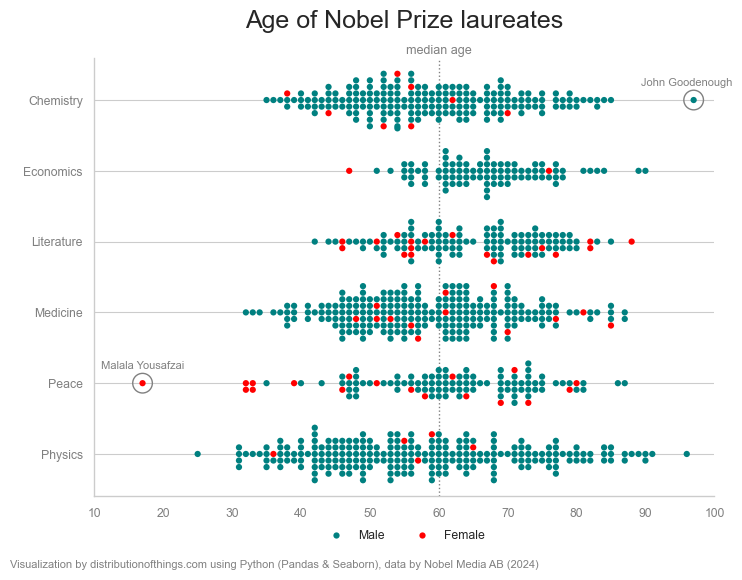

In [1467]:
sns.set_style('whitegrid')
sns.set_context('paper')
plt.figure(figsize=(8, 6))

custom_palette = {"Male": "teal", "Female": "red"}

g = sns.swarmplot(x='winning_age', y='Category', hue='Gender', data=df_age,
                  order=sorted(nobel_clean['Category'].unique()),
                  dodge=False, size=4.5, palette=custom_palette)

# Median line
plt.axvline(x=df_median, color='gray', linestyle=':', linewidth=1)
plt.text(60, -0.65, 'median age', ha='center', fontsize=9, color='grey')

# Grid
plt.grid(True, axis='y', linestyle='-')
plt.grid(False, axis='x')
sns.despine()
plt.xlim(10, 100)
plt.xticks(color='grey')
plt.yticks(color='grey')

# Labelling
plt.title('Age of Nobel Prize laureates', fontsize= 18, ha='center', x=0.5, y=1.05)
plt.xlabel('')
plt.ylabel('')

# Legend
sns.move_legend(
    g, "lower center",
    bbox_to_anchor=(.5, -0.13), ncol=2, title=None, frameon=False,
)

highlight_age_min = 17
highlight_category_min = 'Peace'

# Add a circle around the point
plt.scatter(17, 'Peace', s=200, facecolors='none', edgecolors='grey', linewidth=1)
plt.text(17, 3.8, "Malala Yousafzai", ha='center', fontsize=8, color='grey')
plt.scatter(97, 'Chemistry', s=200, facecolors='none', edgecolors='grey', linewidth=1)
plt.text(96, -0.2, "John Goodenough", ha='center', fontsize=8, color='grey')

# Citations
plt.subplots_adjust(bottom=0.15)

# Add a citation as text at the bottom
plt.figtext(0.35, 0.03, "Visualization by distributionofthings.com using Python (Pandas & Seaborn), data by Nobel Media AB (2024)", ha="center", fontsize=8, color='grey')

# Save
plt.savefig(file_path + "age-of-nobel-prize-laureates.png", dpi=300, bbox_inches='tight')
plt.show()

In [1502]:
# Filter for female laureates
male_counts = df_age[df_age['Gender'] == 'Female'].groupby('Category')['Gender'].count()

# Total laureates per category
total_counts = df_age.groupby('Category')['Gender'].count()

# Calculate percentage of female laureates
female_percentage = (female_counts / total_counts) * 100

# Display the result
print(female_percentage)

Category
Chemistry      4.188482
Economics      2.247191
Literature    15.000000
Medicine       5.752212
Peace         16.666667
Physics        2.212389
Name: Gender, dtype: float64


## Fields medal

### Data processing

In [1471]:
fields_raw = fields_raw.sort_values("Year")

In [1473]:
# Only showing the year for date of birth
fields_year = fields_raw.copy()
fields_year['Date of birth'] = fields_year['Date of birth'].str[-4:].astype(int)
fields_year['Date of birth'].replace(970, 1970, inplace=True)

In [1475]:
# Adding the 2022 medalists
list = {
    'Year' : ['2022', '2022', '2022', '2022'],
    'Name' : ['Hugo', 'June', 'James', 'Maryna'],
    'Last name' : ['Duminil-Copin', 'Huh', 'Maynard', 'Viazovska'],
    'Date of birth' : ['1985', '1983', '1987', '1984']}

recent = pd.DataFrame(list)
recent.head()

,Year,Name,Last name,Date of birth
0,2022,Hugo,Duminil-Copin,1985
1,2022,June,Huh,1983
2,2022,James,Maynard,1987
3,2022,Maryna,Viazovska,1984


In [1477]:
recent['Year'] = recent['Year'].astype('Int64')
recent['Date of birth'] = pd.to_numeric(recent['Date of birth'], errors='coerce')

In [1479]:
# Merge the datasets
combined_df = pd.concat([fields_year, recent], axis=0, ignore_index=True)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           64 non-null     Int64 
 1   Name           64 non-null     object
 2   Last name      64 non-null     object
 3   Date of birth  64 non-null     int64 
dtypes: Int64(1), int64(1), object(2)
memory usage: 2.2+ KB


In [1481]:
# Calculate the winning age
combined_df['winning_age'] = combined_df['Year'] - combined_df['Date of birth']

# Display the first few rows of the DataFrame
combined_df.head()

,Year,Name,Last name,Date of birth,winning_age
0,1936,Lars Ahlfors,Ahlfors,1907,29
1,1936,Jesse Douglas,Douglas,1897,39
2,1950,Laurent Schwartz,Schwartz,1915,35
3,1950,Atle Selberg,Selberg,1917,33
4,1954,Kunihiko Kodaira,Kodaira,1915,39


In [1485]:
# Adding a gender column
combined_df['gender'] = 'Male'
combined_df.loc[combined_df['Name'].isin(['Maryam Mirzakhani', 'Maryna']), 'gender'] = 'Female'

In [1487]:
# Median age
combined_median = combined_df['winning_age'].median()
print(combined_median)

36.5


### Data visualisation

In [1490]:
list = pd.DataFrame(['year', 'winning_age', 'medal', 'gender'])
all_df = pd.concat([list, combined_df], axis=0, ignore_index=True)
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   0              4 non-null      object 
 1   Year           64 non-null     Int64  
 2   Name           64 non-null     object 
 3   Last name      64 non-null     object 
 4   Date of birth  64 non-null     float64
 5   winning_age    64 non-null     Int64  
 6   gender         64 non-null     object 
dtypes: Int64(2), float64(1), object(4)
memory usage: 4.0+ KB


In [1494]:
# Creating a combined df for nobel and fields
# For the fields df
new_fields = combined_df[['Year', 'winning_age', 'gender']].copy()
new_fields['type'] = 'Fields Medal'

# For the nobel df
new_nobel = df_age[['Year', 'Gender', 'winning_age']].copy()
new_nobel.columns = ['Year', 'gender', 'winning_age']
new_nobel['type'] = 'Nobel Prize'

# Merge
combined_final = pd.concat([new_fields, new_nobel], axis=0, ignore_index=True)

# Display the first few rows of the combined DataFrame
print(combined_final.head())

   Year  winning_age gender          type
0  1936           29   Male  Fields Medal
1  1936           39   Male  Fields Medal
2  1950           35   Male  Fields Medal
3  1950           33   Male  Fields Medal
4  1954           39   Male  Fields Medal


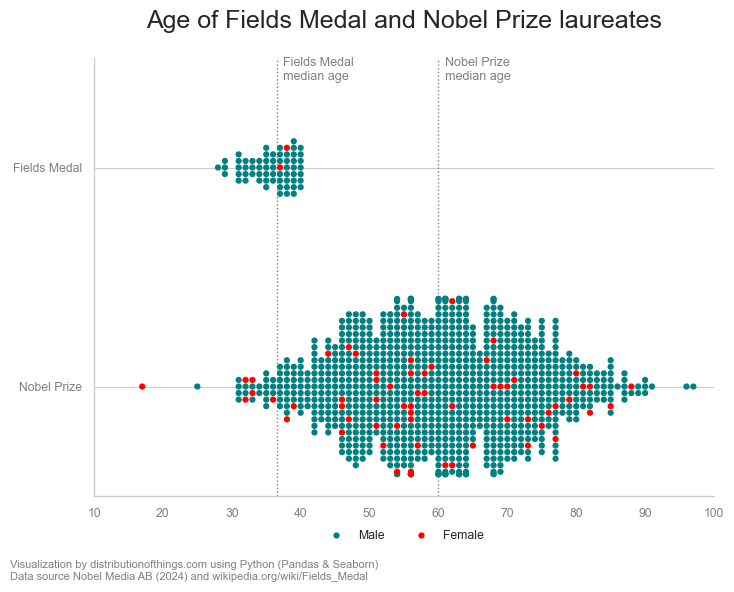

In [1496]:
sns.set_style('whitegrid')
sns.set_context('paper')
plt.figure(figsize=(8, 6))

custom_palette = {"Male": "teal", "Female": "red"}

g = sns.swarmplot(x='winning_age', y='type', hue='gender', data=combined_final,
                  dodge=False, size=4.5, palette=custom_palette)

# Median line
plt.axvline(x=df_median, color='gray', linestyle=':', linewidth=1)
plt.text(61, -0.4, 'Nobel Prize\nmedian age', ha='left', fontsize=9, color='grey')
plt.axvline(x=combined_median, color='gray', linestyle=':', linewidth=1)
plt.text(37.5, -0.4, 'Fields Medal\nmedian age', ha='left', fontsize=9, color='grey')

# Grid
plt.grid(True, axis='y', linestyle='-')
plt.grid(False, axis='x')
sns.despine()
plt.xlim(10, 100)
plt.xticks(color='grey')
plt.yticks(color='grey')

# Labelling
plt.title('Age of Fields Medal and Nobel Prize laureates', fontsize= 18, ha='center', x=0.5, y=1.05)
plt.xlabel('')
plt.ylabel('')

# Legend
sns.move_legend(
    g, "lower center",
    bbox_to_anchor=(.5, -0.13), ncol=2, title=None, frameon=False,
)

# Citations
plt.subplots_adjust(bottom=0.15)

# Add a citation as text at the bottom
plt.figtext(0.02, 0.03, "Visualization by distributionofthings.com using Python (Pandas & Seaborn)", ha="left", fontsize=8, color='grey')
plt.figtext(0.02, 0.01, "Data source Nobel Media AB (2024) and wikipedia.org/wiki/Fields_Medal", ha="left", fontsize=8, color='grey')

# Save
plt.savefig(file_path + "age-of-nobel-and-fields.png", dpi=300, bbox_inches='tight')
plt.show()